# Pandas

### See: [10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html) 

In [1]:
import numpy as np
import pandas as pd

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Because most series use time on the x-axis, pandas generates sequences of dates and converts strings to dates and times.

In [3]:
dates = pd.date_range("20130101", periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD")) # the index is the rows, the columns are a list based on a sting
df

,A,B,C,D
2013-01-01,0.729669,1.225451,0.412014,0.641235
2013-01-02,-1.825717,0.960185,0.269291,0.746415
2013-01-03,0.213649,-0.193239,-0.122402,-0.147047
2013-01-04,-0.583199,-0.173225,1.139885,-0.912420
2013-01-05,-0.209454,-0.086212,1.214239,-0.807248
2013-01-06,-0.502812,-1.826372,-0.518831,-3.304308


In [5]:
# note that numpy's random.randn is a matrix, so it's 6 rows and 4 columns
# random.rand(6, 4) is the same, randn is a standard normal distribution 
np.random.randn(6, 4)

array([[-0.97863987,  0.64524154,  0.5649067 ,  0.44502681],
       [-0.07332091, -0.78518907,  0.10798458,  0.19491208],
       [-0.12531962,  0.60912244, -1.62979074,  0.97070241],
       [-1.25431136,  0.65065653,  1.71964393,  0.6277964 ],
       [-0.38271681,  0.23461239,  1.01189917, -0.21586691],
       [ 0.03179654, -1.90819981,  1.16051325,  1.0613981 ]])

## You can also make a DataFrame from a **dictionary** of objects

In [6]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),                                # Timestamp is a datetime object
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),     # Series is a kind of array
        "D": np.array([3] * 4, dtype="int32"),                        # numpy array   
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)

df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [7]:
df2.dtypes

A          float64
B    datetime64[s]
C          float32
D            int32
E         category
F           object
dtype: object

typing `df2.<TAB>` displays the available attributes and methods for the DataFrame class. Including the columns.

df.head() and df.tail() display the first and last 5 rows of the DataFrame, respectively.

df.index and df.columns display the index and columns of the DataFrame.

## Back to df

In [8]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [9]:
df.to_numpy() # makes a numpy array from multiple datatypes

array([[ 0.72966878,  1.22545095,  0.41201417,  0.64123458],
       [-1.82571734,  0.96018503,  0.26929088,  0.74641485],
       [ 0.21364874, -0.19323927, -0.12240153, -0.14704678],
       [-0.58319916, -0.17322474,  1.13988544, -0.91241999],
       [-0.20945358, -0.08621218,  1.21423946, -0.80724751],
       [-0.50281192, -1.82637173, -0.51883131, -3.30430795]])

In [10]:
df.describe() # summary statistics

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.362977,-0.015569,0.399033,-0.630562
std,0.866903,1.080060,0.684806,1.483705
min,-1.825717,-1.826372,-0.518831,-3.304308
25%,-0.563102,-0.188236,-0.024478,-0.886127
50%,-0.356133,-0.129718,0.340653,-0.477147
75%,0.107873,0.698586,0.957918,0.444164
max,0.729669,1.225451,1.214239,0.746415


`df.T` transposes

`df.sort_index(axis=1, ascending=False)` sorts by index or column

In [11]:
df.sort_index(axis=0, ascending=True) # axis is 0 for rows, 1 for columns
                                        # ascending=False gives D to A

,A,B,C,D
2013-01-01,0.729669,1.225451,0.412014,0.641235
2013-01-02,-1.825717,0.960185,0.269291,0.746415
2013-01-03,0.213649,-0.193239,-0.122402,-0.147047
2013-01-04,-0.583199,-0.173225,1.139885,-0.912420
2013-01-05,-0.209454,-0.086212,1.214239,-0.807248
2013-01-06,-0.502812,-1.826372,-0.518831,-3.304308


In [12]:
df.sort_values(by="B") # sorts by column B

,A,B,C,D
2013-01-06,-0.502812,-1.826372,-0.518831,-3.304308
2013-01-03,0.213649,-0.193239,-0.122402,-0.147047
2013-01-04,-0.583199,-0.173225,1.139885,-0.912420
2013-01-05,-0.209454,-0.086212,1.214239,-0.807248
2013-01-02,-1.825717,0.960185,0.269291,0.746415
2013-01-01,0.729669,1.225451,0.412014,0.641235


In [13]:
df["A"] # returns column A, it yields a series equal to df.A (view only)

2013-01-01    0.729669
2013-01-02   -1.825717
2013-01-03    0.213649
2013-01-04   -0.583199
2013-01-05   -0.209454
2013-01-06   -0.502812
Freq: D, Name: A, dtype: float64

In [14]:
df[0:3]

,A,B,C,D
2013-01-01,0.729669,1.225451,0.412014,0.641235
2013-01-02,-1.825717,0.960185,0.269291,0.746415
2013-01-03,0.213649,-0.193239,-0.122402,-0.147047


In [15]:
df["20121205":"20130104"] # slice by date - note how the date does not have to be in the index

,A,B,C,D
2013-01-01,0.729669,1.225451,0.412014,0.641235
2013-01-02,-1.825717,0.960185,0.269291,0.746415
2013-01-03,0.213649,-0.193239,-0.122402,-0.147047
2013-01-04,-0.583199,-0.173225,1.139885,-0.912420


# Indexing

Indexing refers to **selecting rows** from a DataFrame or Series based on a condition that is evaluated for each row. 

- by label, by index, by value (scalar value), or by boolean index

## 1. by label: .loc

.loc stands for "location". It is used for indexing or selecting data based on labels. 

The primary purpose of .loc is to access a group of rows and columns by labels or a boolean array. 

This makes it a label-based indexing method.

In [16]:
df.loc[dates[0]] # select a cross-section by label - note that index is set to 'dates' above, so it's the first date

A    0.729669
B    1.225451
C    0.412014
D    0.641235
Name: 2013-01-01 00:00:00, dtype: float64

More selections by label: 

``` python
df.loc[:, ["A", "B"]] # select all rows and columns A and B

df.loc["20130102":"20130104", ["A", "B"]] # select rows 20130102 to 20130104 and columns A and B

df.loc["20130102", ["A", "B"]]  # select row 20130102 and columns A and B

In [17]:
df.loc[dates[0], "A"]   # select a single value by row and column, equivalent to df.at[dates[0], 'A']

0.7296687830502205

.loc in combination with string operations

In [18]:
# Set 'description' for rows where the 'Metric' column contains the word 'Scope'

df.loc[df['metric'].str.contains('Scope'), 'description'] = 'Your string value here'

## 2. By position

```python
df.iloc[3] # select row 3
df.iloc[3:5, 0:2] # select rows 3 to 5 and columns 0 to 2
df.iloc[[1, 2, 4], [0, 2]] # select rows 1, 2, and 4 and columns 0 and 2
df.iloc[1:3, :] # select rows 1 to 3 and all columns
df.iloc[:, 1:3]
df.iloc[1, 1] # select row 1 and column 1, equivalent to df.iat[1, 1]
```

## 3. Boolean indexing

In [19]:
# for reference
df

,A,B,C,D
2013-01-01,0.729669,1.225451,0.412014,0.641235
2013-01-02,-1.825717,0.960185,0.269291,0.746415
2013-01-03,0.213649,-0.193239,-0.122402,-0.147047
2013-01-04,-0.583199,-0.173225,1.139885,-0.912420
2013-01-05,-0.209454,-0.086212,1.214239,-0.807248
2013-01-06,-0.502812,-1.826372,-0.518831,-3.304308


In [20]:
# using the values in A to select values
df[df["A"] > 0]

,A,B,C,D
2013-01-01,0.729669,1.225451,0.412014,0.641235
2013-01-03,0.213649,-0.193239,-0.122402,-0.147047


In [21]:
# selecting on a boolean condition (value > 0)
df[df > 0]

,A,B,C,D
2013-01-01,0.729669,1.225451,0.412014,0.641235
2013-01-02,NaN,0.960185,0.269291,0.746415
2013-01-03,0.213649,NaN,NaN,NaN
2013-01-04,NaN,NaN,1.139885,NaN
2013-01-05,NaN,NaN,1.214239,NaN
2013-01-06,NaN,NaN,NaN,NaN


This is element-wise filtering based on a condition. It selects and retains values in the DataFrame df that are greater than 0 and sets other values to NaN.

Let's break it down step-by-step:

`df > 0`: This produces a DataFrame of the same shape as df, but with boolean values (True or False) indicating whether each element of df is greater than 0.

`df[df > 0]`: This selects and retains only the True values from the result in step 1, replacing all False values with NaN.

# Filtering with `.isin`

This filters on values in rows. Note that it's categorical.

In [22]:
df2 = df.copy()

# add a column
df2["E"] = ["one", "one", "two", "three", "four", "three"]

# select column 'E' and filter on values "two" and "four"
df2[df2["E"].isin(["two", "four"])]

# in other words: the subset of df2['E'] where "two" and "four" IS IN

,A,B,C,D,E
2013-01-03,0.213649,-0.193239,-0.122402,-0.147047,two
2013-01-05,-0.209454,-0.086212,1.214239,-0.807248,four


In [23]:
df2[df2["E"] == "two"]

,A,B,C,D,E
2013-01-03,0.213649,-0.193239,-0.122402,-0.147047,two


# Setting and adding data with `.loc` or `.at`

## 1. adding

In [24]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))

# add s1 to df
df["F"] = s1
df

,A,B,C,D,F
2013-01-01,0.729669,1.225451,0.412014,0.641235,NaN
2013-01-02,-1.825717,0.960185,0.269291,0.746415,1.0
2013-01-03,0.213649,-0.193239,-0.122402,-0.147047,2.0
2013-01-04,-0.583199,-0.173225,1.139885,-0.912420,3.0
2013-01-05,-0.209454,-0.086212,1.214239,-0.807248,4.0
2013-01-06,-0.502812,-1.826372,-0.518831,-3.304308,5.0


## 2. setting

By row **and** column:

In [25]:
# set the first row and column A to 0
df.at[dates[0], "A"] = 0  
df

,A,B,C,D,F
2013-01-01,0.000000,1.225451,0.412014,0.641235,NaN
2013-01-02,-1.825717,0.960185,0.269291,0.746415,1.0
2013-01-03,0.213649,-0.193239,-0.122402,-0.147047,2.0
2013-01-04,-0.583199,-0.173225,1.139885,-0.912420,3.0
2013-01-05,-0.209454,-0.086212,1.214239,-0.807248,4.0
2013-01-06,-0.502812,-1.826372,-0.518831,-3.304308,5.0


By index:
```python
df.iat[0, 1] = 0      # sets the first row and column B to 0
```

### By row **and/or** column:

In [26]:
# similarly
df.loc[:, "D"] = 6
df

,A,B,C,D,F
2013-01-01,0.000000,1.225451,0.412014,6.0,NaN
2013-01-02,-1.825717,0.960185,0.269291,6.0,1.0
2013-01-03,0.213649,-0.193239,-0.122402,6.0,2.0
2013-01-04,-0.583199,-0.173225,1.139885,6.0,3.0
2013-01-05,-0.209454,-0.086212,1.214239,6.0,4.0
2013-01-06,-0.502812,-1.826372,-0.518831,6.0,5.0


.loc and .at are similar. .loc is label-based, .at is faster but requires row and column each time, at to specify one value. 

Conclusion: use .loc

## Missing data

In [27]:
df

,A,B,C,D,F
2013-01-01,0.000000,1.225451,0.412014,6.0,NaN
2013-01-02,-1.825717,0.960185,0.269291,6.0,1.0
2013-01-03,0.213649,-0.193239,-0.122402,6.0,2.0
2013-01-04,-0.583199,-0.173225,1.139885,6.0,3.0
2013-01-05,-0.209454,-0.086212,1.214239,6.0,4.0
2013-01-06,-0.502812,-1.826372,-0.518831,6.0,5.0


`.reindex` is pretty powerful to reorder (as to merge) dfs or fill empty values. 

You can use `.reindex()` with the `dropna=True` option, 

or do forward fill `.ffill` or .`bfill` where missing values are filled with the previous or next value in the series (i.e., the value from the "row" directly before or after it).

In [28]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])

# note the index slicing with .loc
df1.loc[dates[0] : dates[1], "E"] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,1.225451,0.412014,6.0,NaN,1.0
2013-01-02,-1.825717,0.960185,0.269291,6.0,1.0,1.0
2013-01-03,0.213649,-0.193239,-0.122402,6.0,2.0,NaN
2013-01-04,-0.583199,-0.173225,1.139885,6.0,3.0,NaN


In [29]:
df1.dropna() # first try df1.isnull.sum() to know how many we're dropping

,A,B,C,D,F,E
2013-01-02,-1.825717,0.960185,0.269291,6.0,1.0,1.0


```python
df1.fillna(value=5) # fills all missing values with 5
```

## Operations

```python
df.mean() # returns the mean of all columns
df.mean(1) # returns the mean of all rows
```

In [30]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2) # rotates or shifts the index by 2
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [31]:
df.apply(lambda x: x.max() - x.min()) # applies a function to each column

A    2.039366
B    3.051823
C    1.733071
D    0.000000
F    4.000000
dtype: float64

A more sophisticated lambda function:

In [32]:
# df['title'] = df.apply(lambda x: x['Metric'] if 'GHG' in x['Metric'] else x['Metric category'], axis=1)

Note that I get these logic operations a lot. 

Another bit of code is this:

In [33]:
# Define 'title' based on the conditions
def create_title(row):
    if any(char.isdigit() for char in row['Metric']):
        return f"{row['Metric category']}: {row['Metric']}"
    elif "Total GHG emissions" in row['Metric']:
        return row['Metric']
    else:
        return row['Metric category']

# df['title'] = df.apply(create_title, axis=1)

It replaces the for-loop logic in dictionaries. 

If you do the same in pandas you iterate over columns instead of rows.

# String operations

In [34]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])

s.str.lower() # converts to lower case

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [35]:
# pattern matching is also possible
# eg. find all letters followed by a

findall = s.str.findall(r"([a-z])a") 
findall

0     []
1     []
2     []
3    [b]
4    [c]
5    NaN
6     []
7     []
8    [c]
dtype: object

In [36]:
s.str.contains('b')

0    False
1    False
2    False
3     True
4    False
5      NaN
6    False
7    False
8    False
dtype: object

In [37]:
# to extract a string in a mixed field and list the unique categories 
# train['Title'] = train['Name'].str.extract('([A-Za-z]+)\.')
# train['Title'].unique()

In [38]:
# to replace, we don't need string operations
# train['Title'] = train['Title'].replace('Mlle', 'Miss')

## Merge

In [39]:
df = pd.DataFrame(np.random.randn(10, 4))

df

,0,1,2,3
0,-0.112678,0.656659,1.638389,-2.332236
1,0.009858,-2.421527,0.429261,0.560227
2,0.002838,-0.702498,0.114218,-0.660992
3,1.465507,0.418361,-0.344127,0.483590
4,-0.499065,0.156910,0.034454,0.444771
5,-0.254846,-0.213496,-0.020602,0.368878
6,-0.977397,-0.319948,1.806144,-1.220579
7,1.380313,-0.965337,1.780513,1.115663
8,-1.741983,-1.367834,1.579770,-0.042474
9,0.831534,-0.196722,-0.047298,1.044401


In [40]:
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0 -0.112678  0.656659  1.638389 -2.332236
 1  0.009858 -2.421527  0.429261  0.560227
 2  0.002838 -0.702498  0.114218 -0.660992,
           0         1         2         3
 3  1.465507  0.418361 -0.344127  0.483590
 4 -0.499065  0.156910  0.034454  0.444771
 5 -0.254846 -0.213496 -0.020602  0.368878
 6 -0.977397 -0.319948  1.806144 -1.220579,
           0         1         2         3
 7  1.380313 -0.965337  1.780513  1.115663
 8 -1.741983 -1.367834  1.579770 -0.042474
 9  0.831534 -0.196722 -0.047298  1.044401]

In [64]:
# note that pieces is a list of 3 DataFrame objects
pieces[0]

,0,1,2,3
0,-0.112678,0.656659,1.638389,-2.332236
1,0.009858,-2.421527,0.429261,0.560227
2,0.002838,-0.702498,0.114218,-0.660992


In [41]:
pd.concat(pieces)

,0,1,2,3
0,-0.112678,0.656659,1.638389,-2.332236
1,0.009858,-2.421527,0.429261,0.560227
2,0.002838,-0.702498,0.114218,-0.660992
3,1.465507,0.418361,-0.344127,0.483590
4,-0.499065,0.156910,0.034454,0.444771
5,-0.254846,-0.213496,-0.020602,0.368878
6,-0.977397,-0.319948,1.806144,-1.220579
7,1.380313,-0.965337,1.780513,1.115663
8,-1.741983,-1.367834,1.579770,-0.042474
9,0.831534,-0.196722,-0.047298,1.044401


Sql style *joins* aka merge

In [42]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})

right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})

left

,key,lval
0,foo,1
1,foo,2


In [43]:
right

,key,rval
0,foo,4
1,foo,5


In [44]:
# here the action happens
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


## Grouping

- Split the data on some criteria

- Apply a function to each group

- Combine the results 

In [45]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)

df

,A,B,C,D
0,foo,one,0.387643,-0.169543
1,bar,one,0.068864,0.347944
2,foo,two,-1.115339,0.124764
3,bar,three,-0.424612,0.835713
4,foo,two,0.550059,-0.642806
5,bar,two,0.134309,0.132693
6,foo,one,1.498186,-0.136978
7,foo,three,-0.607371,-1.230966


In [46]:
df.groupby("A")[["C", "D"]].min() 
# note how the column A contains "foo" and "bar" that then serves as the filter 
# the function is then applied (min, but sum, mean, etc. are also possible)

,C,D
A,,
bar,-0.424612,0.132693
foo,-1.115339,-1.230966


In [47]:
df.groupby("A")['C'].min()

A
bar   -0.424612
foo   -1.115339
Name: C, dtype: float64

In [48]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one    0.068864  0.347944
    three -0.424612  0.835713
    two    0.134309  0.132693
foo one    1.885829 -0.306521
    three -0.607371 -1.230966
    two   -0.565280 -0.518042

## Reshaping

This is similar to **pivot tables in excel**, with the difference that multi-indexing builds a hierarchy of labels by which you can then **group**.

In [49]:
tuples = list(
    zip(
        ["bar", "bar", "bar", "baz", "foo", "foo", "qux", "qux"],
        ["one", "two", "one", "two", "one", "two", "one", "two"],
    ))

Note the `MultiIndex.from_tuples` that is then passed as the index of the df

In [50]:
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])

df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])
df2 = df[:4]
df2

A         B
first second                    
bar   one    -0.871671  1.243596
      two    -0.422529 -0.426985
      one    -0.194631  0.171952
baz   two     0.545351  0.621343

In [51]:
# so it's basically adding a hierarchical index object as an index, which then groups by that index
# compare it to `tuples` above
tuples, index

([('bar', 'one'),
  ('bar', 'two'),
  ('bar', 'one'),
  ('baz', 'two'),
  ('foo', 'one'),
  ('foo', 'two'),
  ('qux', 'one'),
  ('qux', 'two')],
 MultiIndex([('bar', 'one'),
             ('bar', 'two'),
             ('bar', 'one'),
             ('baz', 'two'),
             ('foo', 'one'),
             ('foo', 'two'),
             ('qux', 'one'),
             ('qux', 'two')],
            names=['first', 'second']))

In [52]:
# pivotted
stacked = df2.stack()
stacked

first  second   
bar    one     A   -0.871671
               B    1.243596
       two     A   -0.422529
               B   -0.426985
       one     A   -0.194631
               B    0.171952
baz    two     A    0.545351
               B    0.621343
dtype: float64

In [53]:
# stacked.unstack()

### Pivot tables

In [67]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)
df

,A,B,C,D,E
0,one,A,foo,-1.479898,-0.081760
1,one,B,foo,-0.357701,-1.816107
2,two,C,foo,1.426108,-0.760986
3,three,A,bar,0.608271,-1.527390
4,one,B,bar,0.806263,0.816030
5,one,C,bar,-0.761177,-0.842287
6,two,A,foo,0.441105,-0.135496
7,three,B,foo,0.948155,0.311215
8,one,C,foo,0.617604,0.996396
9,one,A,bar,0.244869,0.531986


In [55]:
# to pivot around C, which has the values/labels 'foo' and 'bar', with A and B as the index 
# note how it doesn't repeat index labels in A
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A  0.827740  0.992927
      B  1.572860  1.892014
      C -1.328847 -0.372127
three A -2.659441       NaN
      B       NaN -0.104915
      C -0.559748       NaN
two   A       NaN -0.891474
      B  0.588038       NaN
      C       NaN -2.201392

In [71]:
# pd.pivot_table is similar to df.pivot() but not quite...
df.pivot(columns="C")

A           B              D                   E          
C     bar    foo  bar  foo       bar       foo       bar       foo
0     NaN    one  NaN    A       NaN -1.479898       NaN -0.081760
1     NaN    one  NaN    B       NaN -0.357701       NaN -1.816107
2     NaN    two  NaN    C       NaN  1.426108       NaN -0.760986
3   three    NaN    A  NaN  0.608271       NaN -1.527390       NaN
4     one    NaN    B  NaN  0.806263       NaN  0.816030       NaN
5     one    NaN    C  NaN -0.761177       NaN -0.842287       NaN
6     NaN    two  NaN    A       NaN  0.441105       NaN -0.135496
7     NaN  three  NaN    B       NaN  0.948155       NaN  0.311215
8     NaN    one  NaN    C       NaN  0.617604       NaN  0.996396
9     one    NaN    A  NaN  0.244869       NaN  0.531986       NaN
10    two    NaN    B  NaN  0.690372       NaN  0.795975       NaN
11  three    NaN    C  NaN -0.845941       NaN -0.318234       NaN

## Time series

In [56]:
rng = pd.date_range("1/1/2022", periods=100, freq="S")

ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts

C:\Users\johan\AppData\Local\Temp\ipykernel_21440\2075241088.py:1: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  rng = pd.date_range("1/1/2022", periods=100, freq="S")


2022-01-01 00:00:00     14
2022-01-01 00:00:01    452
2022-01-01 00:00:02    112
2022-01-01 00:00:03    451
2022-01-01 00:00:04    232
                      ... 
2022-01-01 00:01:35    294
2022-01-01 00:01:36    324
2022-01-01 00:01:37    397
2022-01-01 00:01:38    401
2022-01-01 00:01:39    178
Freq: s, Length: 100, dtype: int32

In [57]:
ts.resample("10S").sum()

C:\Users\johan\AppData\Local\Temp\ipykernel_21440\3071623756.py:1: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  ts.resample("10S").sum()


2022-01-01 00:00:00    2895
2022-01-01 00:00:10    3056
2022-01-01 00:00:20    2941
2022-01-01 00:00:30    1867
2022-01-01 00:00:40    2511
2022-01-01 00:00:50    3329
2022-01-01 00:01:00    1851
2022-01-01 00:01:10    2171
2022-01-01 00:01:20    2518
2022-01-01 00:01:30    2970
Freq: 10s, dtype: int32

.resample is useful for time-based data:

- S is seconds
- min is minutes
- W is weekly, D is day, B is business day, etc... 

This gets a bit too detailed. [See here](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases)


In [58]:
correlations = df2.corr() # for correlations between numerical data
correlations

,A,B
A,1.000000,-0.174201
B,-0.174201,1.000000


<Axes: >

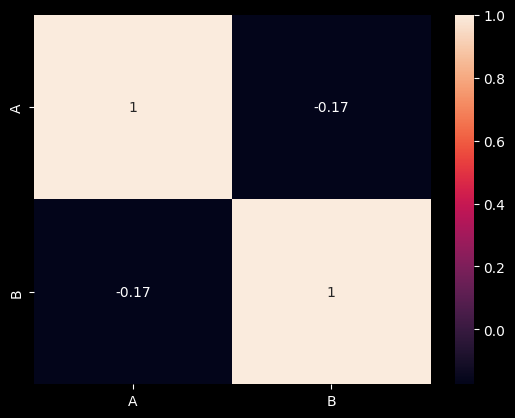

In [59]:
import seaborn as sns 
import matplotlib.pyplot as plt

plt.figure(dpi=100)
sns.heatmap(correlations, annot=True) # to visualise the correlations


## Plotting

In [60]:
import matplotlib.pyplot as plt

plt.close("all")

<Axes: >

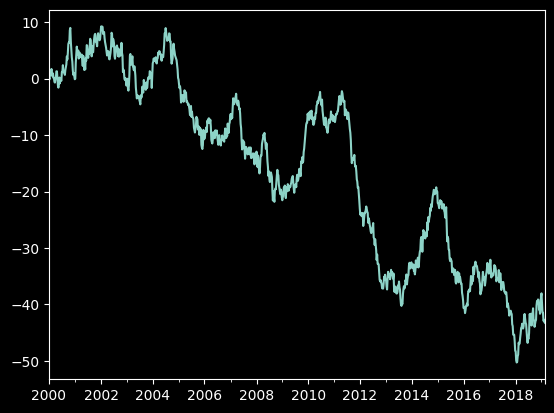

In [61]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000, freq='W'))
ts = ts.cumsum()
ts.plot()

<Figure size 640x480 with 0 Axes>

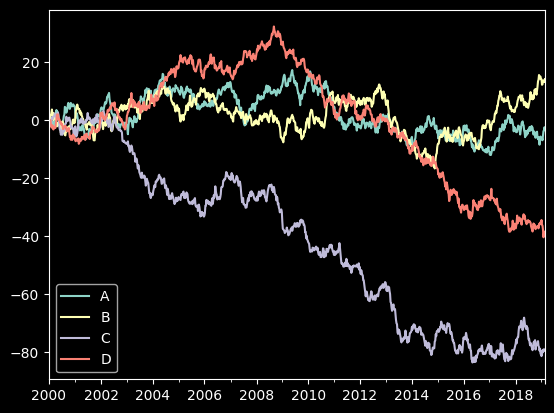

In [62]:
df = pd.DataFrame(
    np.random.randn(1000, 4), 
    index=ts.index,            # note how it reuses the index from ts with ts.index
    columns=["A", "B", "C", "D"]
)

df = df.cumsum()

plt.figure()

df.plot()

plt.legend(loc='best')

## importing and exporting data

CSV

```python
df.to_csv("foo.csv") # export to csv
pd.read_csv("foo.csv") # import from csv

df.to_excel("foo.xlsx", sheet_name="Sheet1") # export to excel
pd.read_excel("foo.xlsx", "Sheet1", index_col=None, na_values=["NA"]) # import from excel
```

# Other things

### Setting types
```py
df.name.astype('category')
df.origin.astype('category')

or
pd.to_numeric(test['Ticket_'])
pd.Categorical(['book', 'magazine'])
```

Counting Nans
```py
df.isnull().sum() 
```

## From the `titanic` project (see projects):

```py
# impressive to see the survival rates by sex
train.groupby('Sex')['Survived'].value_counts()

# even better, as it shows the sexes for the every column 
train.groupby('Sex').count()

# using the aggfunc of pd.pivot_table:
pd.pivot_table(train, index='Survived', columns='Sex', values='Ticket', aggfunc ='count')
```

### **To fill Nans** with averages and modes:
```py
mean_age = train['Age'].mean()
mode_embarked = train['Embarked'].mode()[0]  
train['Embarked'] = train['Embarked'].fillna(mode_embarked)
train['Age'] = train['Age'].fillna(mean_age)
```

The `.mode()[0]` is used because the mode() function returns a series, and we just want to get the first (and in many cases, the only) value.

Or faster
```py
for column in mpg.columns:
    if mpg[column].dtype == 'object':
        mpg[column] = mpg[column].fillna(mpg[column].mode()[0])
    else:
        mpg[column] = mpg[column].fillna(mpg[column].mean())
```   


### **binning**
```py
# Define the bin edges and labels
bins = [0, 15, 25, 33, 58]
labels = ['Child', 'Teenager', 'Adult', 'Senior']

# Create a new feature 'AgeGroup' by binning the 'Age' feature
train['AgeGroup'] = pd.cut(train['Age'], bins=bins, labels=labels)


# similarly:
# Create family size groupings
train['fam_size'] = pd.cut(train.FamilySize, [0,1,4,7,11], labels=['single','small', 'large', 'very_large'])
```